# COURSE:   PGP [AI&ML]

## Learner :  Chaitanya Kumar Battula
## Module  : Machine Learning
## Topic   : Practice Project_Logistic Regression_Titanic Survival

1) Determine which features are important
2) Convert categorical features into numerical type
3) Build a classifier to predict survival
4) Evaluate the model performence using classification report


In [1]:
# Importing libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from pandas.plotting import scatter_matrix

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics





In [2]:
df_train=pd.read_csv('titanic.csv')
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [3]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [4]:
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [5]:
df_train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [6]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df_train.shape

(891, 12)

In [8]:
# Cabin has aboue 80% of nsn so wed rop it alltogether.

df_train = df_train.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df_train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [9]:
def age_approx(cols):
    Age=cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
   
    else:
        return Age        
        
    
    
    

In [10]:
df_train.groupby(['Pclass']).mean()

,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,
1,0.629630,38.233441,0.416667,0.356481,84.154687
2,0.472826,29.877630,0.402174,0.380435,20.662183
3,0.242363,25.140620,0.615071,0.393075,13.675550


In [11]:
df_train['Age'] = df_train[['Age', 'Pclass']].apply(age_approx, axis=1)

In [12]:
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [13]:
df_train.dropna(inplace=True)
df_train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [14]:
df_train.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

In [15]:
df_train_dummied = pd.get_dummies(df_train, columns=["Sex"])
df_train_dummied

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,S,0,1
1,1,1,38.0,1,0,71.2833,C,1,0
2,1,3,26.0,0,0,7.9250,S,1,0
3,1,1,35.0,1,0,53.1000,S,1,0
4,0,3,35.0,0,0,8.0500,S,0,1
...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,S,0,1
887,1,1,19.0,0,0,30.0000,S,1,0
888,0,3,24.0,1,2,23.4500,S,1,0
889,1,1,26.0,0,0,30.0000,C,0,1


In [16]:
df_train_dummied =  pd.get_dummies(df_train_dummied, columns=["Embarked"])
df_train_dummied                                    

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,1,0,0
2,1,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,1,35.0,1,0,53.1000,1,0,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000,0,1,0,0,1
887,1,1,19.0,0,0,30.0000,1,0,0,0,1
888,0,3,24.0,1,2,23.4500,1,0,0,0,1
889,1,1,26.0,0,0,30.0000,0,1,1,0,0


In [17]:
df_train_dummied.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
Survived,1.000000,-0.335549,-0.052051,-0.034040,0.083151,0.255290,0.541585,-0.541585,0.169966,0.004536,-0.151777
Pclass,-0.335549,1.000000,-0.405549,0.081656,0.016824,-0.548193,-0.127741,0.127741,-0.245733,0.220558,0.076466
Age,-0.052051,-0.405549,1.000000,-0.242807,-0.170089,0.120938,-0.083730,0.083730,0.042585,-0.080875,0.013598
SibSp,-0.034040,0.081656,-0.242807,1.000000,0.414542,0.160887,0.116348,-0.116348,-0.060074,-0.026692,0.069438
Parch,0.083151,0.016824,-0.170089,0.414542,1.000000,0.217532,0.247508,-0.247508,-0.011588,-0.081585,0.061512
Fare,0.255290,-0.548193,0.120938,0.160887,0.217532,1.000000,0.179958,-0.179958,0.270731,-0.116684,-0.163758
Sex_female,0.541585,-0.127741,-0.083730,0.116348,0.247508,0.179958,1.000000,-1.000000,0.084520,0.075217,-0.121405
Sex_male,-0.541585,0.127741,0.083730,-0.116348,-0.247508,-0.179958,-1.000000,1.000000,-0.084520,-0.075217,0.121405
Embarked_C,0.169966,-0.245733,0.042585,-0.060074,-0.011588,0.270731,0.084520,-0.084520,1.000000,-0.148646,-0.782613
Embarked_Q,0.004536,0.220558,-0.080875,-0.026692,-0.081585,-0.116684,0.075217,-0.075217,-0.148646,1.000000,-0.499261


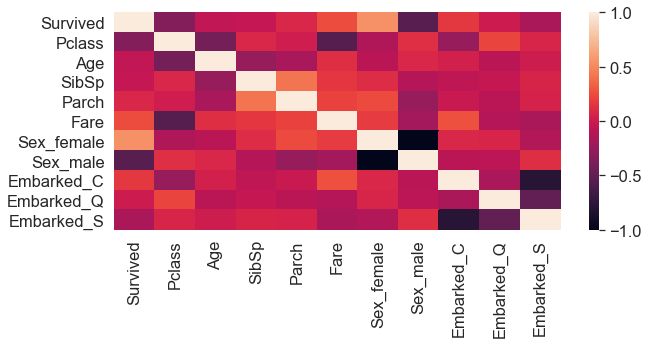

In [18]:
plt.figure(figsize= (10,4))
sns.heatmap(df_train_dummied.corr())    #, annot=True

In [19]:
used_features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
X = df_train_dummied[used_features].values
y = df_train_dummied['Survived'].values
                     

In [20]:
xtrain,xtest,ytrain,ytest = train_test_split(X,y, test_size=0.3,random_state=1)

In [21]:
print("Shape of xtrain:", xtrain.shape )
print("Shape of xtest:",  xtest.shape )
print("Shape of ytrain:", ytrain.shape )
print("Shape of ytest:",  ytest.shape )

Shape of xtrain: (622, 9)
Shape of xtest: (267, 9)
Shape of ytrain: (622,)
Shape of ytest: (267,)


In [22]:
LogReg = LogisticRegression()
LogReg.fit(xtrain, ytrain)

LogisticRegression()

In [23]:
ypredicted = LogReg.predict(xtest)
metrics.confusion_matrix(ytest, ypredicted)

array([[143,  23],
       [ 22,  79]], dtype=int64)

In [24]:
metrics.accuracy_score(ytest, ypredicted)

0.8314606741573034

In [25]:
len(xtest)

267

In [26]:
print(classification_report(ytest, ypredicted))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86       166
           1       0.77      0.78      0.78       101

    accuracy                           0.83       267
   macro avg       0.82      0.82      0.82       267
weighted avg       0.83      0.83      0.83       267



In [27]:
LogReg.coef_

array([[-1.0416583 , -0.03986563, -0.2418657 , -0.0405489 ,  1.19684229,
        -1.191862  ,  0.35142572, -0.03561634, -0.3108291 ]])

In [28]:
LogReg.intercept_

array([3.6503613])

In [29]:
df_train_dummied.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [30]:
df_train_dummied[used_features].columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [31]:
LogReg.predict_proba(xtest)

array([[0.26543762, 0.73456238],
       [0.39670167, 0.60329833],
       [0.94739252, 0.05260748],
       [0.25946287, 0.74053713],
       [0.94405682, 0.05594318],
       [0.13498849, 0.86501151],
       [0.33318424, 0.66681576],
       [0.51891172, 0.48108828],
       [0.78162823, 0.21837177],
       [0.40735921, 0.59264079],
       [0.74014692, 0.25985308],
       [0.21156393, 0.78843607],
       [0.74871108, 0.25128892],
       [0.14562753, 0.85437247],
       [0.86463688, 0.13536312],
       [0.36950158, 0.63049842],
       [0.89368398, 0.10631602],
       [0.29766694, 0.70233306],
       [0.17634635, 0.82365365],
       [0.39887297, 0.60112703],
       [0.90490942, 0.09509058],
       [0.55285824, 0.44714176],
       [0.86434636, 0.13565364],
       [0.93739461, 0.06260539],
       [0.51638224, 0.48361776],
       [0.51590185, 0.48409815],
       [0.03915836, 0.96084164],
       [0.8692353 , 0.1307647 ],
       [0.89806853, 0.10193147],
       [0.32523047, 0.67476953],
       [0.